In [1]:
# https://blog.quantinsti.com/random-forest-algorithm-in-python/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas_datareader.data as web

In [2]:
apple = web.DataReader('aapl'
                       , 'yahoo'
                       , start = '12/12/1980'
                      )
apple.shape

(10092, 6)

In [3]:
apple['Open_Close_%Diff'] = (apple.Open - apple.Close) / apple.Open
apple['High_Low_%Diff'] = (apple.High - apple.Low) / apple.Low
apple['Adj_Close_%Change'] = apple['Adj Close'].pct_change()
apple['5_Day_STDev'] = apple['Adj_Close_%Change'].rolling(5).std()
apple['5_Day_SMA'] = apple['Adj_Close_%Change'].rolling(5).mean()
apple.dropna(inplace=True)

In [4]:
apple.shape

(10087, 11)

In [5]:
apple = apple.sample(frac=1)

In [6]:
X = apple[['Open_Close_%Diff'
           , 'High_Low_%Diff'
           , '5_Day_STDev'
           , '5_Day_SMA'
          ]]

y = np.where(apple['Adj_Close_%Change'].shift(-5) > apple['Adj_Close_%Change'], 1, -1)

In [7]:
split = int(apple.shape[0] * 0.75)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7565, 4) (2522, 4)
(7565,) (2522,)


In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score

print(f'Correct Predition %: {accuracy_score(y_test, rfc.predict(X_test))}')

Correct Predition %: 0.6883425852498017


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.69      0.69      0.69      1263
           1       0.69      0.69      0.69      1259

    accuracy                           0.69      2522
   macro avg       0.69      0.69      0.69      2522
weighted avg       0.69      0.69      0.69      2522



In [11]:
apple['Strategy_Returns'] = apple['Adj_Close_%Change'].shift(-5, fill_value = apple['Adj_Close_%Change'].median()) * rfc.predict(X)

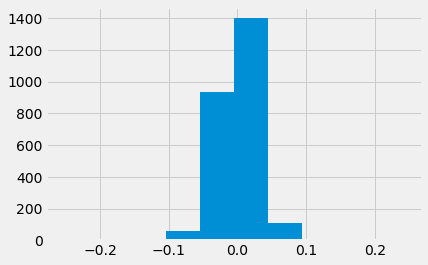

In [12]:
apple.Strategy_Returns[split:].hist();

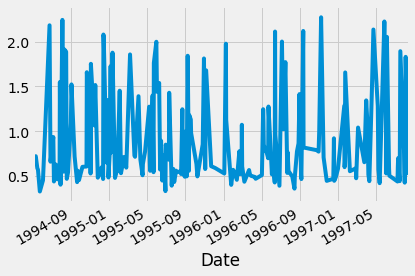

In [13]:
(apple.Strategy_Returns[split:] + 1).cumprod().plot()
plt.xlim(8887,10087);